In [2]:
## LOADING THE DATA
import pandas as pd
bike_rentals = pd.read_csv("/Users/ankitkothari/Documents/machine_learning/ml_notebooks/hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
##CATEGORIZING THE WEEKDAY COLUMN FORM INTEGER TO CATEGORIES
##CONVERTING THEM TO BINARIES

def replace(x):
    if x==0:
        return "Sunday"
    elif x==1:
        return "Monday"
    elif x==2:
        return "Tuesday"
    elif x==3:
        return "Wednesday"
    elif x==4:
        return "Thursday"
    elif x==5:
        return "Friday"
    elif x==6:
        return "Saturday"

bike_rentals['weekday'] = bike_rentals['weekday'].apply(lambda x: replace(x))
weekday_dummies = pd.get_dummies(bike_rentals['weekday'])
weekday_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [4]:
##DROPPING THE INSTANT AND WEEKDAY COLUMNS

bike_combined = pd.concat([bike_rentals, weekday_dummies], axis=1)
bike_combined.drop(['weekday','instant'], axis=1, inplace=True)
bike_combined.head(15)

,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,...,casual,registered,cnt,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,...,3,13,16,0,0,1,0,0,0,0
1,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,...,8,32,40,0,0,1,0,0,0,0
2,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,...,5,27,32,0,0,1,0,0,0,0
3,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,...,3,10,13,0,0,1,0,0,0,0
4,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,...,0,1,1,0,0,1,0,0,0,0
5,2011-01-01,1,0,1,5,0,0,2,0.24,0.2576,...,0,1,1,0,0,1,0,0,0,0
6,2011-01-01,1,0,1,6,0,0,1,0.22,0.2727,...,2,0,2,0,0,1,0,0,0,0
7,2011-01-01,1,0,1,7,0,0,1,0.20,0.2576,...,1,2,3,0,0,1,0,0,0,0
8,2011-01-01,1,0,1,8,0,0,1,0.24,0.2879,...,1,7,8,0,0,1,0,0,0,0
9,2011-01-01,1,0,1,9,0,0,1,0.32,0.3485,...,8,6,14,0,0,1,0,0,0,0


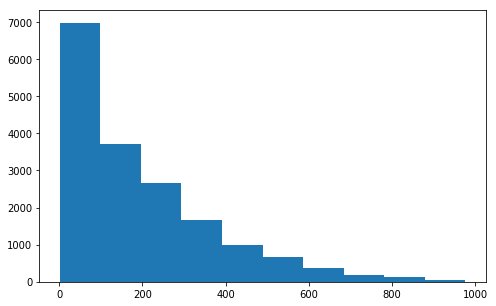

In [5]:
## PLOTTING THE HISTOGRAM FOR THE NUMBER OF TOTAL BIKES RENTED (CNT COLUMN)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,5))
plt.hist(bike_combined["cnt"])
plt.show()

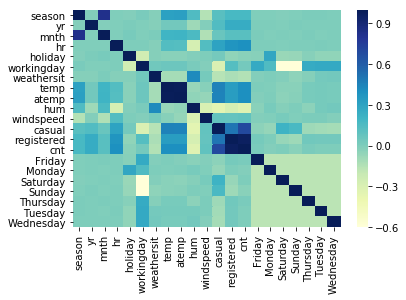

In [6]:
##CORRELATION METRIX IN THE BIKE RENTALS DATA SET
import numpy as np
corr= bike_combined.corr()
corr
sns.heatmap(corr, cmap="YlGnBu")

In [7]:
## CORRELATION FOR THE TOTAL BIKES RENTED ON OTHER FEATURES
corr_cnt = bike_combined.corr()['cnt']
corr_cnt.sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
Sunday       -0.027118
Monday       -0.012860
Saturday      0.001692
Wednesday     0.003746
Tuesday       0.003969
Friday        0.015034
Thursday      0.015653
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [10]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return "night"
    elif hour >=6 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 18:
        return "afternoon"
    elif hour >= 18 and hour <=24:
        return "evening"

bike_combined["time_label"] = bike_combined["hr"].apply(assign_label)
weekday_timeday = pd.get_dummies(bike_combined['time_label'])
weekday_timeday.head()


,afternoon,evening,morning,night
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [51]:
bike_combined_new = pd.concat([bike_combined, weekday_timeday], axis=1)
bike_combined_new.drop(['time_label'], axis=1, inplace=True)
bike_combined_new.head(5)

,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,afternoon,evening,morning,night
0,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,...,0,1,0,0,0,0,0,0,0,1
1,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,...,0,1,0,0,0,0,0,0,0,1
2,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,...,0,1,0,0,0,0,0,0,0,1
3,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,...,0,1,0,0,0,0,0,0,0,1
4,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,...,0,1,0,0,0,0,0,0,0,1


In [16]:
##CREATING THE TEST AND TRAINING DATASET

import numpy as np
shuffled_index = np.random.permutation(bike_combined_new.index)
bike_combined_new = bike_combined_new.iloc[shuffled_index]
highest_column = int(bike_combined.shape[0]*0.8)
train = bike_combined_new[0:highest_column]
test = bike_combined_new[highest_column:]

In [17]:
##RUNNING A LINEAR REGRESSION MODEL

import numpy as np
from sklearn.linear_model import LinearRegression
features = bike_combined_new.drop(['cnt','casual','dteday','registered','atemp'], axis=1)
feature_columns= [k for k in features.columns]
reg = LinearRegression()
reg.fit(train[feature_columns], train["cnt"])
predictions = reg.predict(test[feature_columns])
mse = np.mean((predictions - test["cnt"]) ** 2)
mse

16802.57938686104

In [18]:
##DECISION TREE MODEL 1:
## min_samples_leaf=5

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)
reg.fit(train[feature_columns], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [19]:
## MAE VALUE FOR DECISION TREE MODEL 1:
import numpy
predictions = reg.predict(test[feature_columns])
numpy.mean((predictions - test["cnt"]) ** 2)

2737.5572568880884

In [52]:
##DECISION TREE MODEL 2:
## min_samples_leaf=2
## max_depth=15

from sklearn.tree import DecisionTreeRegressor
import numpy
tree_count = 10
# Each "bag" will have 60% of the number of original rows
bag_proportion = .6
predictions = []
for i in range(tree_count):
    # We select 60% of the rows from train, sampling with replacement
    # We set a random state to ensure we'll be able to replicate our results
    # We set it to i instead of a fixed value so we don't get the same sample every time
    bag = train.sample(frac=bag_proportion, replace=True, random_state=i)
    # Fit a decision tree model to the "bag"
    clf = DecisionTreeRegressor(random_state=1, min_samples_leaf=2, max_depth=15)
    clf.fit(bag[feature_columns], bag["cnt"])
    predict = clf.predict(test[feature_columns])
    # Using the model, make predictions on the test data
    predictions.append(predict)
    

In [53]:
## MAE VALUE FOR DECISION TREE MODEL 2:

import warnings
warnings.filterwarnings('ignore')

combined = numpy.sum(predictions, axis=0) / 10
rounded = numpy.round(combined)
rounded
test['predictiosn']=rounded
test['predictiosn']
numpy.mean((test['predictiosn'] - test["cnt"]) ** 2)

2071.6631185270426

In [45]:
##RANDOM FOREST MODEL 1:
## min_samples_leaf=5
## max_depth=15

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=5,random_state=1, max_depth=15)
reg.fit(train[feature_columns], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [46]:
## MAE VALUE FOR RANDOM FOREST MODEL 1:

predictions = reg.predict(test[feature_columns])
np.mean((predictions - test["cnt"]) ** 2)

2248.0659774568308

In [69]:
##RANDOM FOREST MODEL 2:
## min_samples_leaf=2
## n_estimators=30

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=2,random_state=1, n_estimators=30)
reg.fit(train[feature_columns], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [70]:
## MAE VALUE FOR RANDOM FOREST MODEL 2:

predictions = reg.predict(test[feature_columns])
np.mean((predictions - test["cnt"]) ** 2)

1881.9941584698574